## TODO
- Resize frames before saving to Google Cloud Storage

In [1]:
import os, sys
from PIL import Image
from hurry.filesize import size as size_of

In [4]:
direct = r"C:\Users\Brendan\Projects\Misc\objdetect\objdetect\extractor\submissions\agg8n5\frames"
frame = '00.jpg'
path = os.path.join(direct, frame)


image = Image.open(path)

print(size_of(os.path.getsize(path)))
image.size

81K


(608, 1080)

In [5]:
new_frame = '00_opt.jpg'
new_path = os.path.join(direct, new_frame)

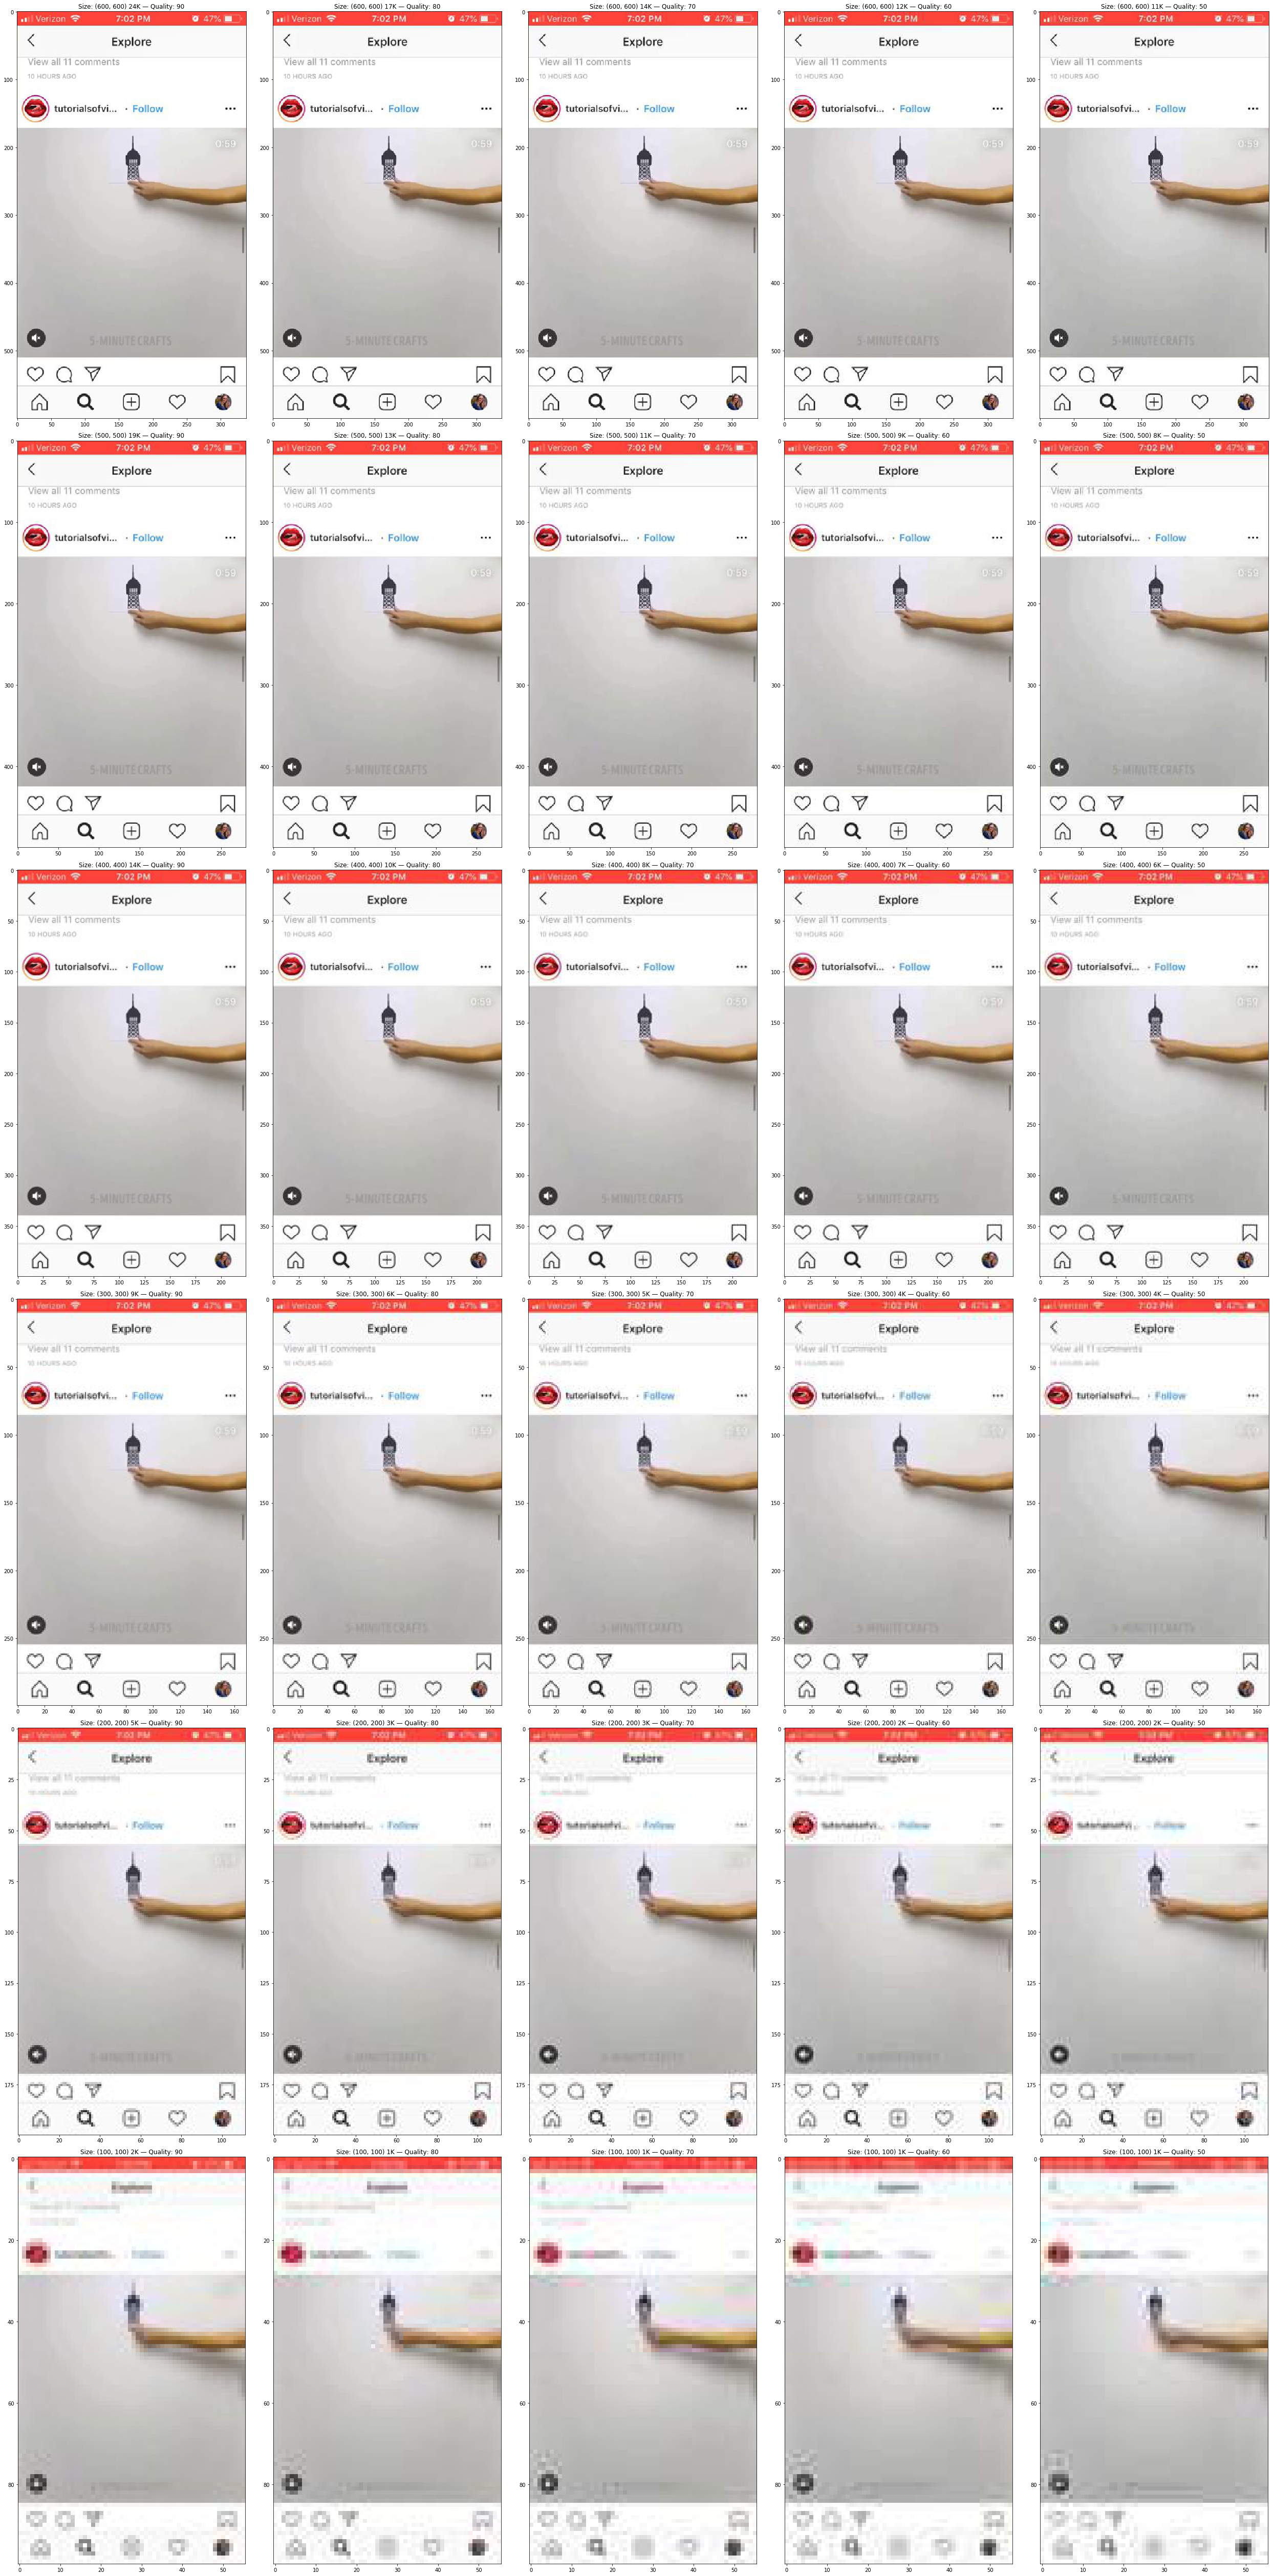

In [44]:
from itertools import permutations
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def scale(image):
    w, h = image.size
    w, h = int(w * .5), int(h * .5)   # scale down 50%
    return image.resize((w, h))

sizes = [(x, x) for x in range(100, 700, 100)]
qualities = [x for x in range(50, 100, 10)]

plt.close('all')
fig = plt.figure(figsize=(35, 70))
gs1 = gridspec.GridSpec(len(sizes), len(qualities))

n = 0
for size in reversed(sizes):
    for qual in reversed(qualities):
        im = image.copy()
        im.thumbnail(size)
        im.save(new_path, optimize=True, quality=qual)
        im_size = size_of(os.path.getsize(new_path))
        ax = fig.add_subplot(gs1[n])
        ax.set_title(f"Size: {size} {im_size} — Quality: {qual}")
        new_im = Image.open(new_path)
        ax.imshow(new_im)
        n += 1

gs1.tight_layout(fig)
plt.show()

In [39]:
thumb_size = (500, 500)
image2 = image.copy()
image2.thumbnail(thumb_size)
image2.save(new_path, optimize=True, quality=50)

print(size_of(os.path.getsize(new_path)))

new_image = Image.open(new_path)

8K


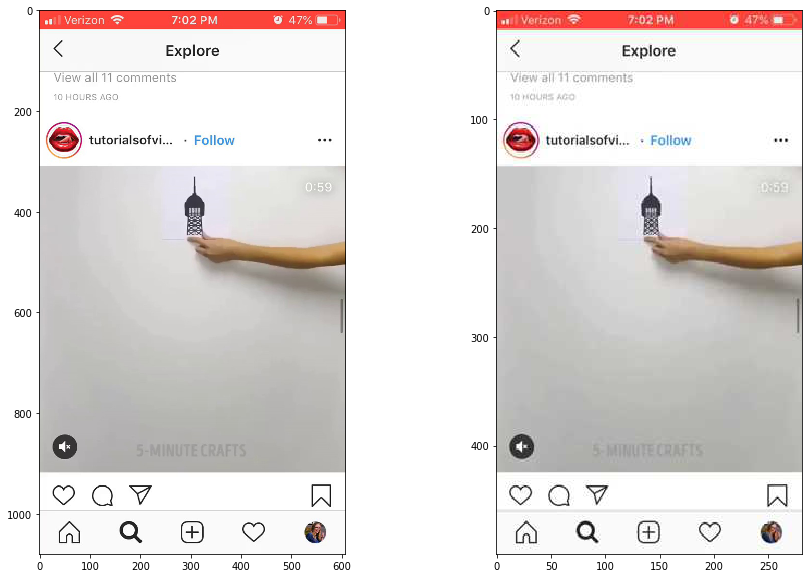

In [40]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

ax1.imshow(image)
ax2.imshow(new_image)

plt.show()

### Best quality to size looks like (500,500) at 50 quality

In [46]:
import cv2

In [47]:
cap = cv2.VideoCapture('https://v.redd.it/ioxtnhug8g821/DASH_2_4_M?source=fallback')

In [48]:
ret, image = cap.read()

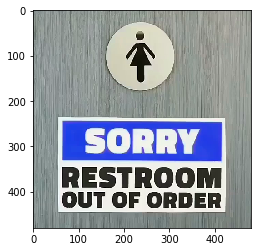

In [49]:
plt.imshow(image)

In [51]:
cap.get(cv2.CAP_PROP_FPS)

30.0

In [52]:
int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

570